In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('traffic.csv')

In [3]:
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [4]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   event    226278 non-null  object        
 1   date     226278 non-null  datetime64[ns]
 2   country  226267 non-null  object        
 3   city     226267 non-null  object        
 4   artist   226241 non-null  object        
 5   album    226273 non-null  object        
 6   track    226273 non-null  object        
 7   isrc     219157 non-null  object        
 8   linkid   226278 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 15.5+ MB


In [6]:
df.describe()

,date
count,226278
mean,2021-08-21 21:04:31.768355584
min,2021-08-19 00:00:00
25%,2021-08-20 00:00:00
50%,2021-08-22 00:00:00
75%,2021-08-24 00:00:00
max,2021-08-25 00:00:00


In [10]:
print('Shape:', df.shape)
print('Date Range:', df['date'].min(), 'to', df['date'].max())
print('\nMissing Values:')
print(df.isna().sum())

Shape: (226278, 9)
Date Range: 2021-08-19 00:00:00 to 2021-08-25 00:00:00

Missing Values:
event         0
date          0
country      11
city         11
artist       37
album         5
track         5
isrc       7121
linkid        0
dtype: int64


In [28]:
summary = {
    'Total Events': len(df),
    'Unique Countries': df['country'].nunique(),
    'Unique Cities': df['city'].nunique(),
    'Unique Artists': df['artist'].nunique(),
    'Unique Tracks': df['track'].nunique(),
    'Unique Links': df['linkid'].nunique(),
    'Date Range Start': df['date'].min(),
    'Date Range End': df['date'].max()
}
pd.DataFrame(summary.items(), columns=['Metric', 'Value'])


,Metric,Value
0,Total Events,226278
1,Unique Countries,211
2,Unique Cities,11993
3,Unique Artists,2419
4,Unique Tracks,3562
5,Unique Links,3839
6,Date Range Start,2021-08-19 00:00:00
7,Date Range End,2021-08-25 00:00:00


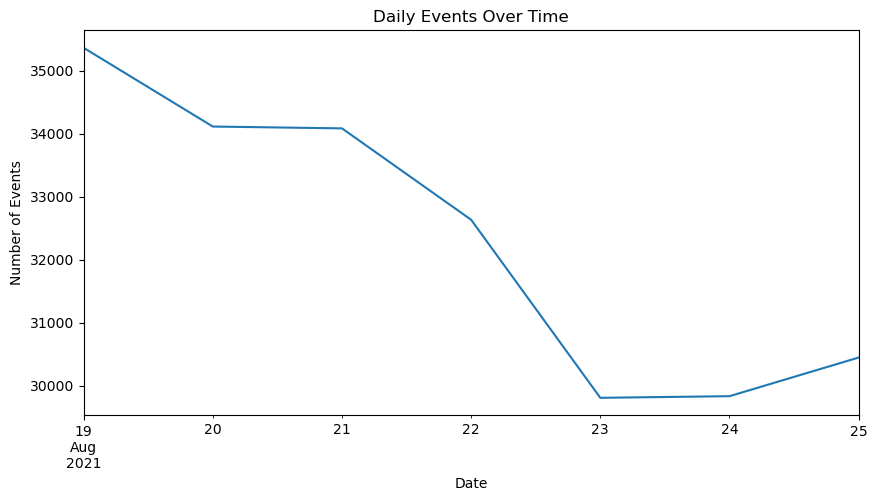

In [29]:
daily_count = df.groupby('date').size()
plt.figure(figsize=(10,5))
daily_count.plot()
plt.title('Daily Events Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.show()

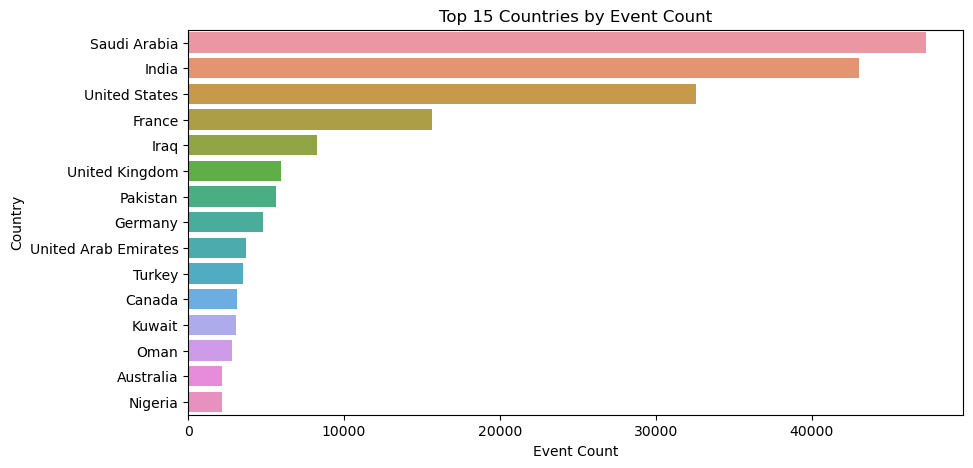

In [30]:
top_country = df['country'].value_counts().head(15)
plt.figure(figsize=(10,5))
sns.barplot(x=top_country.values, y = top_country.index )
plt.title('Top 15 Countries by Event Count')
plt.xlabel('Event Count')
plt.ylabel('Country')
plt.show()

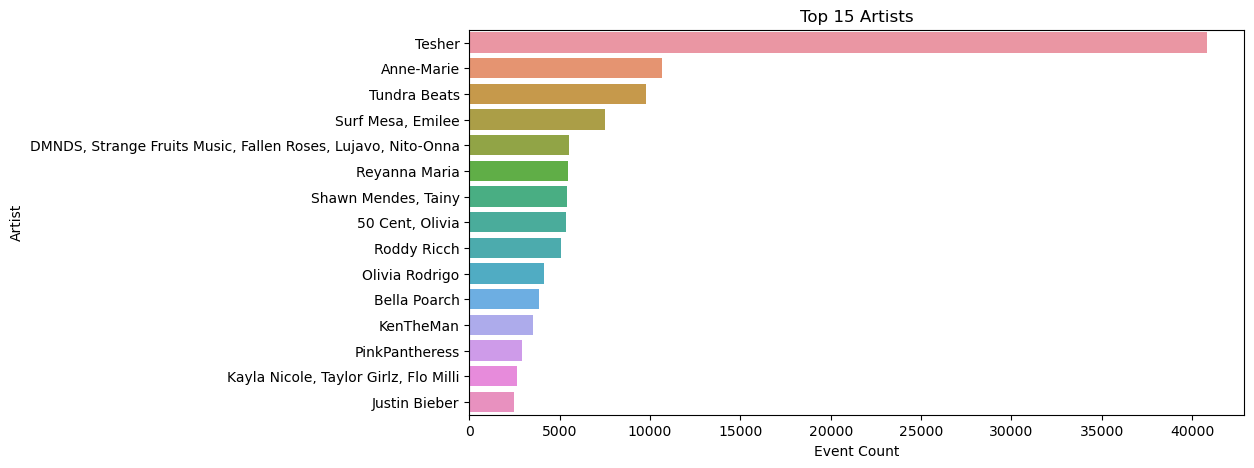

In [31]:
top_artists = df['artist'].fillna('Unknown').value_counts().head(15)
plt.figure(figsize=(10,5))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('Top 15 Artists')
plt.xlabel('Event Count')
plt.ylabel('Artist')
plt.show()

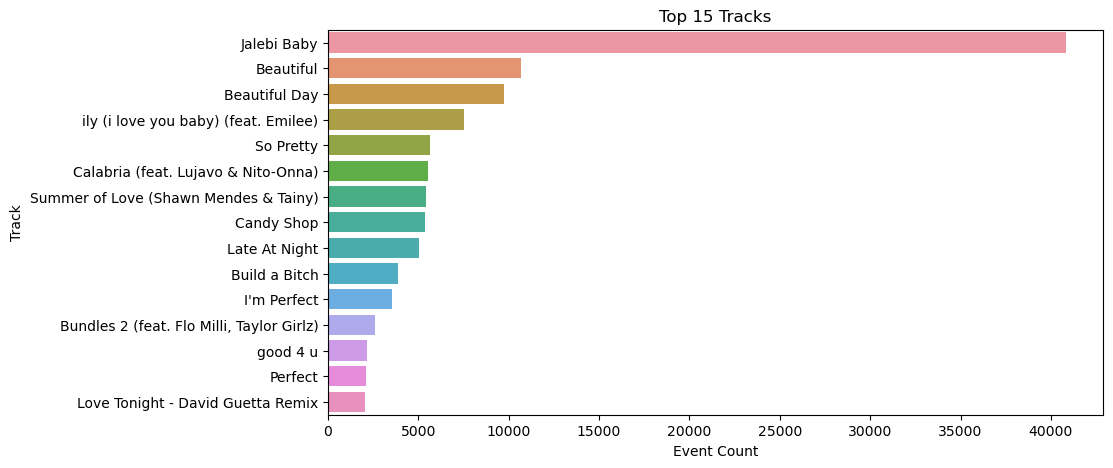

In [32]:
top_tracks=df['track'].fillna('Unknown').value_counts().head(15)
plt.figure(figsize=(10,5))
sns.barplot(x=top_tracks.values,y= top_tracks.index)
plt.title('Top 15 Tracks')
plt.xlabel('Event Count')
plt.ylabel('Track')
plt.show()

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1401: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


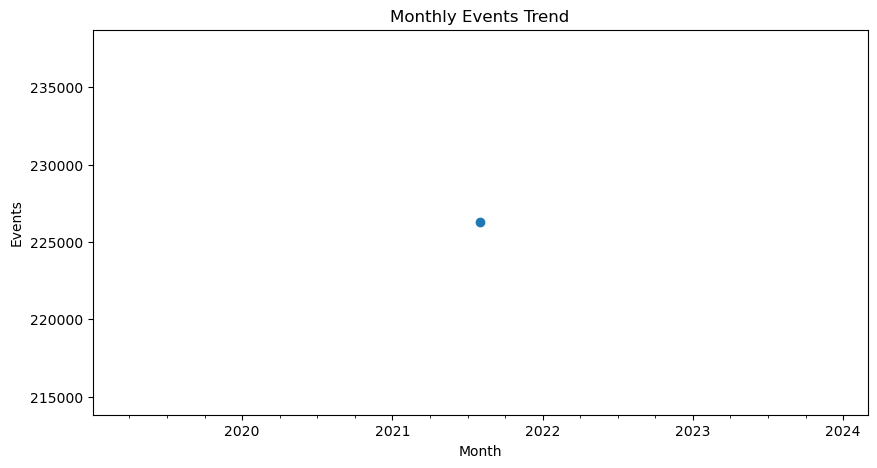

In [33]:
monthly_counts = df.set_index('date').resample('M').size()
plt.figure(figsize=(10,5))
monthly_counts.plot(marker='o')
plt.title('Monthly Events Trend')
plt.xlabel('Month')
plt.ylabel('Events')
plt.show()

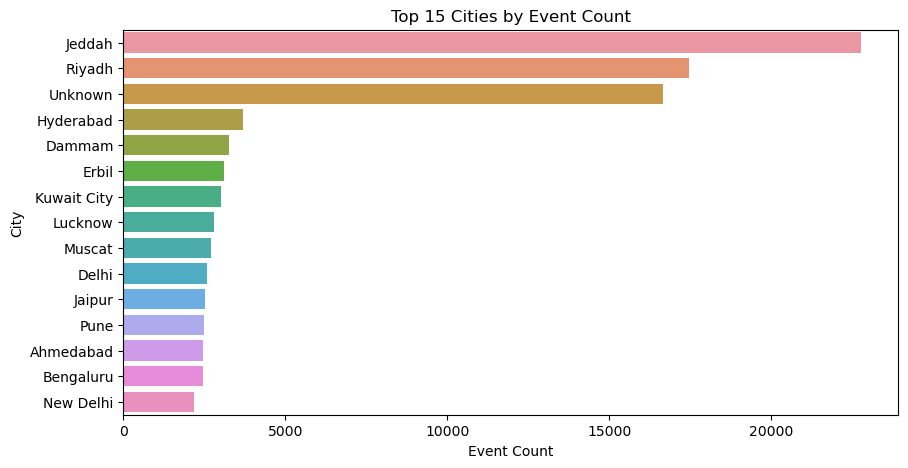

In [34]:
top_city = df['city'].value_counts().head(15)
plt.figure(figsize=(10,5))
sns.barplot(x=top_city.values, y = top_city.index )
plt.title('Top 15 Cities by Event Count')
plt.xlabel('Event Count')
plt.ylabel('City')
plt.show()